In [64]:
import zipfile

In [65]:
zip=zipfile.ZipFile('/content/archive (7).zip')
zip.extractall()

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [67]:
df=pd.read_csv('/content/malicious_phish.csv')

In [68]:
df.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [69]:
df.shape

(651191, 2)

##Number of Labels

In [70]:
df['type'].unique()

array(['phishing', 'benign', 'defacement', 'malware'], dtype=object)

##Number of Lables in each type

<Axes: xlabel='type', ylabel='count'>

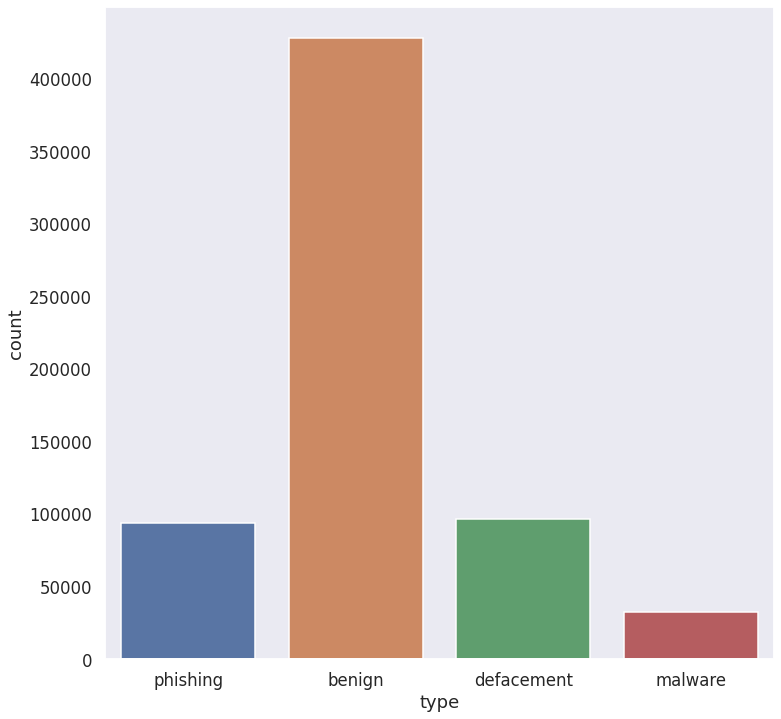

In [71]:
plt.figure(figsize=(12,12))
sns.set_style(style="dark")
sns.countplot(x='type',data=df)

In [72]:
df['type'].value_counts()

benign        428103
defacement     96457
phishing       94111
malware        32520
Name: type, dtype: int64

In [73]:
print(f"The count of phishing is {df[df['type']=='phishing'].count()}")

The count of phishing is url     94111
type    94111
dtype: int64


In [74]:
print(f"The count of benign is {df[df['type']=='benign'].count()}")

The count of benign is url     428103
type    428103
dtype: int64


In [75]:
print(f"The count of defacement is {df[df['type']=='defacement'].count()}")

The count of defacement is url     96457
type    96457
dtype: int64


In [76]:
print(f"The count of malware is {df[df['type']=='malware'].count()}")

The count of malware is url     32520
type    32520
dtype: int64


#Beningn type is more ,hence dataset might be imbalanced,we need to get rid the excess, i am not doing as of now .I can do once you say

##One Hot Encoding the labels

In [77]:
labels_one_hot=pd.get_dummies(df['type'])

In [79]:
labels_one_hot

,benign,defacement,malware,phishing
0,0,0,0,1
1,1,0,0,0
2,1,0,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
651186,0,0,0,1
651187,0,0,0,1
651188,0,0,0,1
651189,0,0,0,1


In [80]:
df=pd.concat([df,labels_one_hot],axis=1)

In [81]:
df.head()

,url,type,benign,defacement,malware,phishing
0,br-icloud.com.br,phishing,0,0,0,1
1,mp3raid.com/music/krizz_kaliko.html,benign,1,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,1,0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,1,0,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,1,0,0
